In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset Gapminder
url = "/content/gapminder.csv"
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dan informasi dataset
print(df.head())
print(df.info())

# Memilih data untuk tahun 2007
df_2007 = df[df['year'] == 2007]

# Menghitung rata-rata global untuk GDP per kapita dan harapan hidup
global_gdp_mean = df_2007['gdpPercap'].mean()
global_lifeexp_mean = df_2007['lifeExp'].mean()

print(f"Rata-rata GDP per kapita global (2007): {global_gdp_mean:.2f}")
print(f"Rata-rata harapan hidup global (2007): {global_lifeexp_mean:.2f}")

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None
Rata-rata GDP per kapita global (2007): 11680.07
Rata-rata harapan hidup global (2007): 67.01


<ipython-input-2-7af0b3445059>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


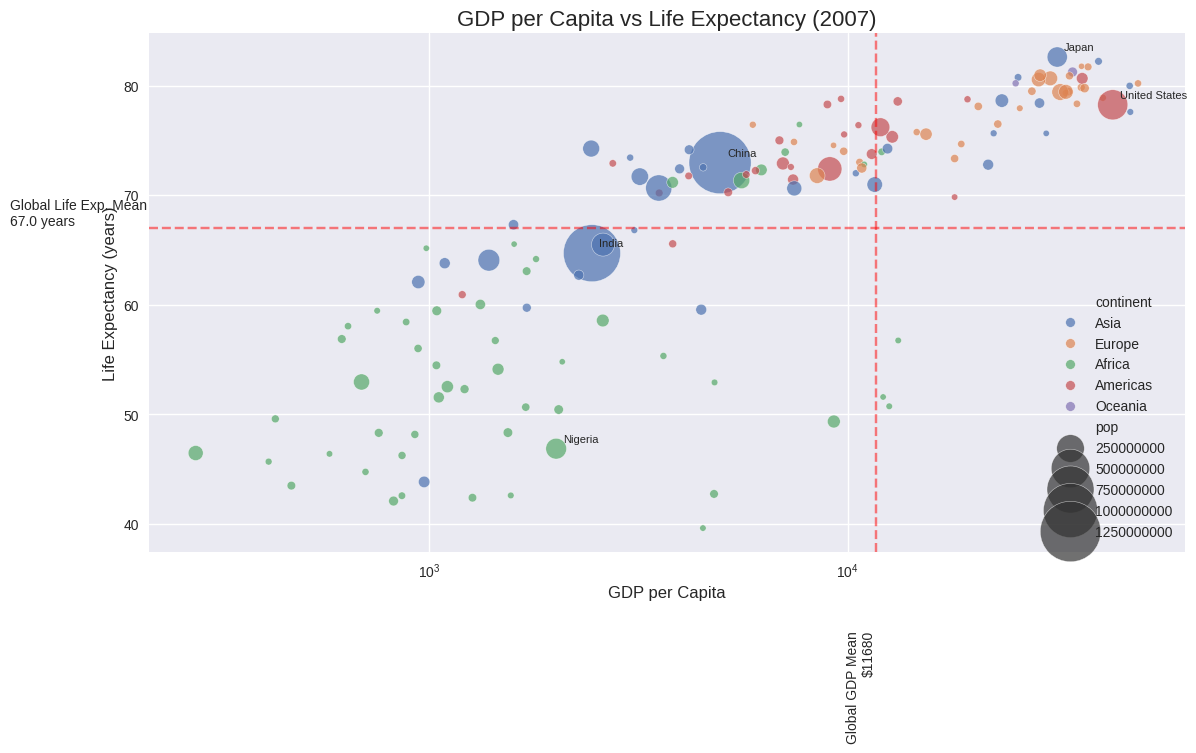

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style plot
plt.style.use('seaborn')
sns.set_palette("deep")

# Membuat plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df_2007, x="gdpPercap", y="lifeExp",
                          size="pop", sizes=(20, 2000),
                          hue="continent", alpha=0.7)

# Menambahkan garis rata-rata global
plt.axhline(y=global_lifeexp_mean, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=global_gdp_mean, color='r', linestyle='--', alpha=0.5)

# Mempercantik plot
plt.title("GDP per Capita vs Life Expectancy (2007)", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.xscale('log')  # Menggunakan skala logaritmik untuk GDP
plt.text(global_gdp_mean, 20, f"Global GDP Mean\n${global_gdp_mean:.0f}",
         rotation=90, va='bottom', ha='right')
plt.text(100, global_lifeexp_mean, f"Global Life Exp. Mean\n{global_lifeexp_mean:.1f} years",
         va='bottom', ha='left')

# Menambahkan anotasi untuk beberapa negara terpilih
countries_to_annotate = ['United States', 'China', 'India', 'Japan', 'Nigeria']
for country in countries_to_annotate:
    country_data = df_2007[df_2007['country'] == country]
    plt.annotate(country, (country_data['gdpPercap'].values[0], country_data['lifeExp'].values[0]),
                 xytext=(5,5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()